In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# load the dataset
listing_df = pd.read_csv('inputs/Listings.csv', parse_dates=['host_since'], encoding='ISO-8859-1', low_memory=False)
listing_df.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [14]:
# filter the data and keep the required columns
listing_df = listing_df.loc[listing_df['city'] == 'Paris', ['host_since', 'neighbourhood', 'city', 'accommodates', 'price']]
print(listing_df.shape)

(64690, 5)


In [15]:
# to cast the date columns manually to date format
listing_df['host_since'] = pd.to_datetime(listing_df['host_since'])
listing_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [16]:
# get the variables types of the dataframe
listing_df.dtypes

host_since       datetime64[ns]
neighbourhood            object
city                     object
accommodates              int64
price                     int64
dtype: object

In [17]:
# checking for number of NaN values
listing_df.isna().sum()
# listing_df.isnull().sum()


host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [18]:
# get a summary statistics of numeric variables of the listing df
listing_df.describe()

,host_since,accommodates,price
count,64657,64690.000000,64690.000000
mean,2015-11-01 11:06:05.528867584,3.037997,113.096445
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588766,214.433668


In [43]:
# average room price in Paris by neighbourhood
paris_listing_neighbourhood = (
    listing_df
    .groupby('neighbourhood', as_index=False)
    .aggregate({'price':'mean'})
    .sort_values('price', ascending=False)
)

paris_listing_neighbourhood

,neighbourhood,price
4,Elysee,210.536765
8,Louvre,175.379972
15,Passy,161.144635
13,Palais-Bourbon,156.856578
9,Luxembourg,155.638639
1,Bourse,149.496801
7,Hotel-de-Ville,144.472110
18,Temple,138.446823
14,Pantheon,122.662150
12,Opera,119.038644


In [48]:
# average room price according to accomodations
paris_listing_accomodations = (
    listing_df[listing_df.neighbourhood == 'Elysee']
    .groupby('accommodates', as_index=False)
    .aggregate({'price':'mean'})
    .sort_values('price', ascending=False)
    .assign(accommodates=lambda x: x.accommodates.astype(str))
)

print(paris_listing_accomodations)

   accommodates       price
14           14  971.000000
13           13  842.500000
11           11  805.000000
15           16  800.000000
12           12  529.625000
10           10  500.857143
9             9  440.272727
7             7  411.538462
8             8  405.518519
6             6  355.508571
5             5  328.817073
4             4  212.096070
2             2  155.103352
3             3  152.828767
1             1   79.522222
0             0    0.000000


In [34]:
# calcuating number of new hosts in Paris
# listing_df['year'] = listing_df['host_since'].dt.year # we can also explicitly extract the year form the date column and then group by it
paris_listing_over_time = (
    listing_df
    .set_index('host_since')
    .resample('Y')
    .agg(
        total_new_hosts=('neighbourhood', 'count'),
        average_price=('price','mean')
        )
)

print(paris_listing_over_time)

            total_new_hosts  average_price
host_since                                
2008-12-31                4      77.750000
2009-12-31              106     159.641509
2010-12-31              416     125.031250
2011-12-31             1339     124.828230
2012-12-31             4592     111.578615
2013-12-31             8142     107.096414
2014-12-31            10922     100.253800
2015-12-31            12147     103.646250
2016-12-31             8871     114.159847
2017-12-31             4585     108.658888
2018-12-31             4294     138.209362
2019-12-31             5694     129.757113
2020-12-31             3412     141.456038
2021-12-31              133      93.488722


Text(0, 0.5, 'Neiborhoods')

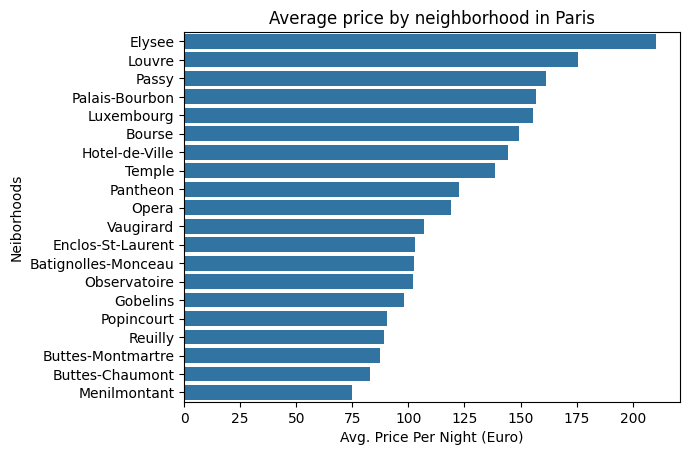

In [53]:
# Plotting the average price by neighborhood in Paris
g = sns.barplot(x='price', y='neighbourhood', data=paris_listing_neighbourhood)
g.set_title('Average price by neighborhood in Paris')
plt.xlabel('Avg. Price Per Night (Euro)')
plt.ylabel('Neiborhoods')

Text(0, 0.5, 'Accommodates')

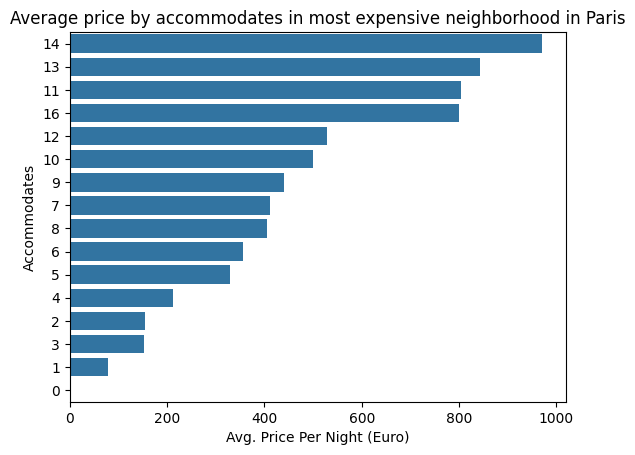

In [54]:
# Plotting average price by accommodates in most expensive neighborhood in Paris
g = sns.barplot(x='price', y='accommodates', data=paris_listing_accomodations)
g.set_title('Average price by accommodates in most expensive neighborhood in Paris')
plt.xlabel('Avg. Price Per Night (Euro)')
plt.ylabel('Accommodates')

Text(4.944444444444445, 0.5, 'Avg. Price Per Night (Euro)')

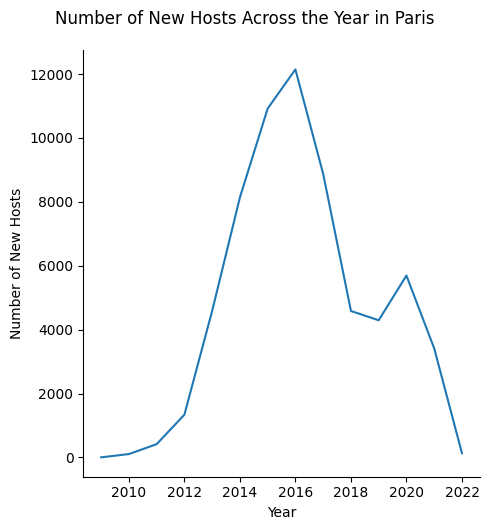

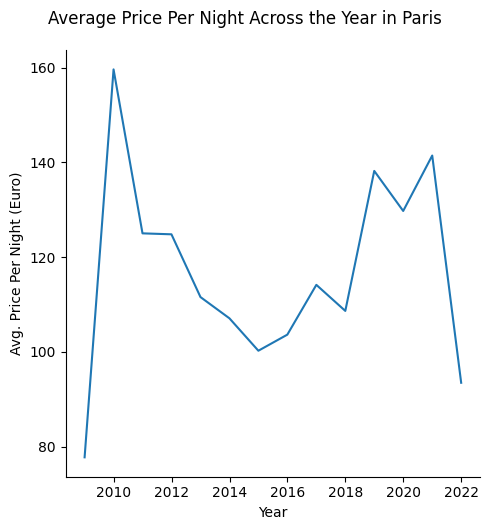

In [107]:
# Plotting count of host and average price overtime
g = sns.relplot(x=paris_listing_over_time.index, y='total_new_hosts', data=paris_listing_over_time, kind='line')
g.fig.suptitle('Number of New Hosts Across the Year in Paris', y=1.05)
plt.xlabel('Year')
plt.ylabel('Number of New Hosts')

g = sns.relplot(x=paris_listing_over_time.index, y='average_price', data=paris_listing_over_time, kind='line')
g.fig.suptitle('Average Price Per Night Across the Year in Paris', y=1.05)
plt.xlabel('Year')
plt.ylabel('Avg. Price Per Night (Euro)')

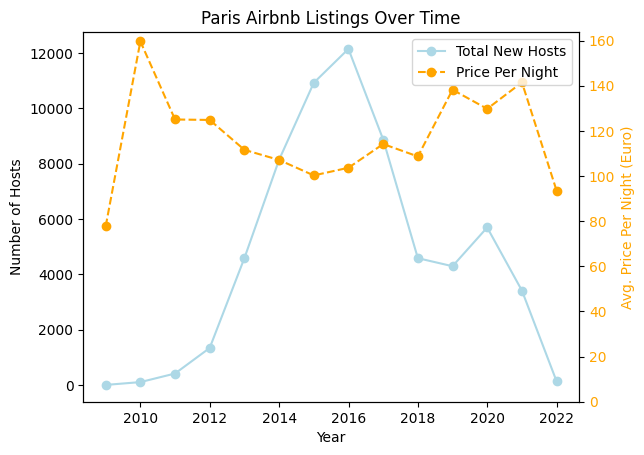

In [111]:
# Plotting count of host and average price overtime in the same plot
fig, ax = plt.subplots()
ax.plot(
    paris_listing_over_time.index,
    paris_listing_over_time.total_new_hosts,
    label='Total New Hosts',
    color='lightblue',
    marker='o'
)

ax.set_ylabel('Number of Hosts')
ax.set_xlabel('Year')

ax2 = ax.twinx()
ax2.plot(
    paris_listing_over_time.index,
    paris_listing_over_time.average_price,
    label='Price Per Night',
    color='orange',
    linestyle='--',
    marker='o'
)
ax2.set_ylabel('Avg. Price Per Night (Euro)', color='orange')
ax2.set_ylim(0)
plt.yticks(color='orange')
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)
plt.title('Paris Airbnb Listings Over Time')
plt.show()